In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [2]:
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons
from sklearn.datasets import load_digits, load_wine, load_diabetes

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
# conda install -c anaconda py-xgboost
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

from sklearn.svm import SVR, SVC

import statsmodels.api as sm

from sklearn.tree import export_graphviz
import graphviz 

+ 회귀, 분류 이상치 탐지 등에 사용되는 지도 학습 방법
+ 클래스 사이의 경계에 위치한 데이터 포인터를 서포트 벡터라고 한다.
+ 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 학습
+ 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
+ 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행


+ 관련 클래스
    - 회귀 , 분류 : SVR, SVC
    - 선형, 비선형 : LinearSVC, LinearSVR, KernelSVC, KernelSVR

# 1. 커널 기법 

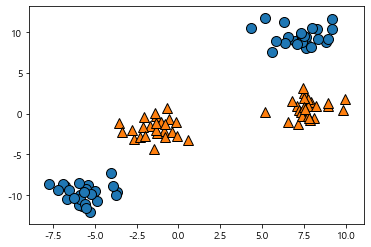

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y%2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


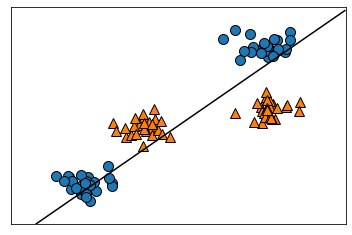

In [11]:
linear_svm = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

Text(0.5, 0, '특성1 ** 2')

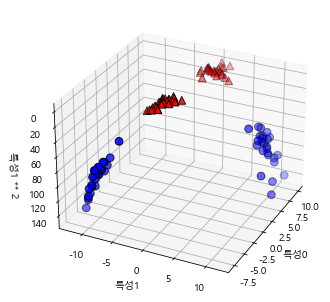

In [12]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 ** 2')

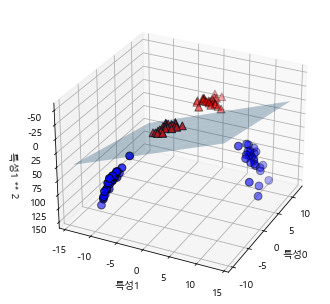

In [13]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

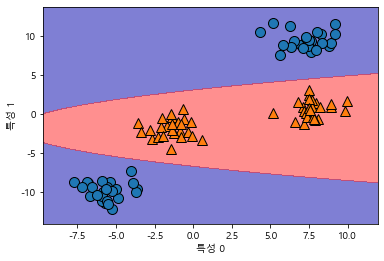

In [14]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 2. 하이퍼 파라미터

+ cost
    - decision boundary와 마진의 간격을 어느정도로 할지 결정
    - cost가 작으면 마진은 넓어진다.
    
    
+ gamma
    - 훈련 데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    - gamman가 작을 경우 영향을 끼치는 범위가 넓어진다.

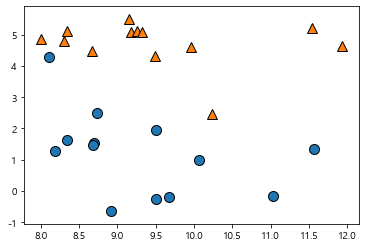

In [16]:
X, y = mglearn.tools.make_handcrafted_dataset()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [17]:
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)

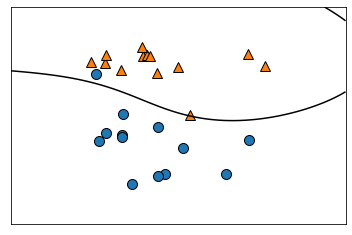

In [18]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [20]:
sv = svm.support_vectors_

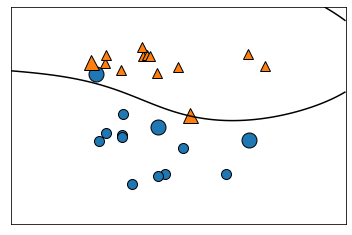

In [21]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15)

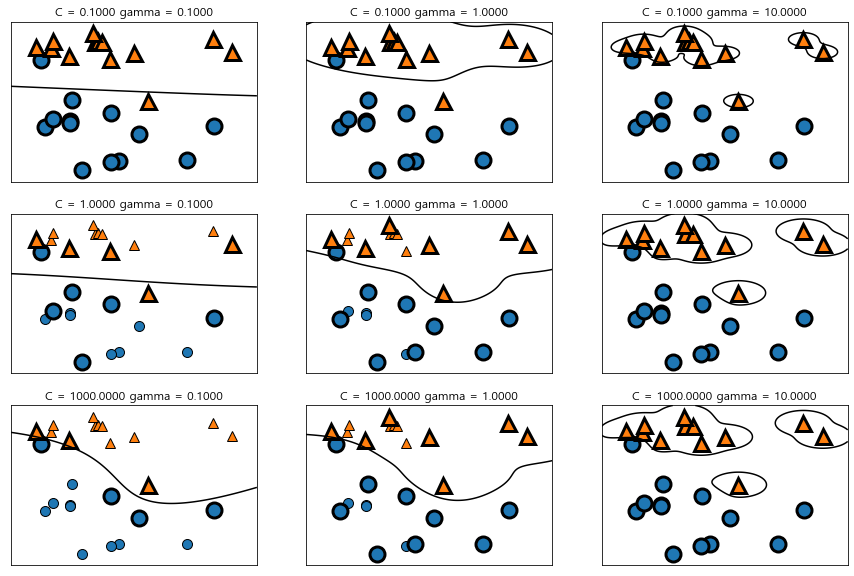

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)
    

# 3. SVM 클래스의 종류

In [4]:
import multiprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE

### (1) 회귀 모델과 분류 모델

#### 1) 회귀 모델 (SVR)

In [5]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.2177283706374875
테스트 결과 :  0.13544178468518187


#### 2) 분류 모델(SVC)

In [6]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9014084507042254
테스트 결과 :  0.9230769230769231


### (2) 커널 기법

+ 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
+ scikit-learn에서는  Linear, Polynomial, RBF(Radial Basis Function) 등 다양한 커널기법을 지원

In [27]:
##### 회귀 모델에서 확인

X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train, y_train)

print("linear_svr 학습 결과 : ", linear_svr.score(X_train, y_train))
print("linear_svr 테스트 결과 : ", linear_svr.score(X_test, y_test))

polynomial_svr = SVR(kernel="poly")
polynomial_svr.fit(X_train, y_train)

print("polynomial_svr 학습 결과 : ", polynomial_svr.score(X_train, y_train))
print("polynomial_svr 테스트 결과 : ", polynomial_svr.score(X_test, y_test))

rbf_svr = SVR(kernel="rbf")
rbf_svr.fit(X_train, y_train)

print("rbf_svr 학습 결과 : ", rbf_svr.score(X_train, y_train))
print("rbf_svr 테스트 결과 : ", rbf_svr.score(X_test, y_test))

linear_svr 학습 결과 :  0.715506620496448
linear_svr 테스트 결과 :  0.6380398541506058
polynomial_svr 학습 결과 :  0.2024454261446289
polynomial_svr 테스트 결과 :  0.133668450367462
rbf_svr 학습 결과 :  0.2177283706374875
rbf_svr 테스트 결과 :  0.13544178468518187


In [28]:
##### 분류 모델에서 확인

X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel="linear")
linear_svc.fit(X_train, y_train)

print("linear_svc 학습 결과 : ", linear_svc.score(X_train, y_train))
print("linear_svc 테스트 결과 : ", linear_svc.score(X_test, y_test))

polynomial_svc = SVC(kernel="poly")
polynomial_svc.fit(X_train, y_train)

print("polynomial_svc 학습 결과 : ", polynomial_svc.score(X_train, y_train))
print("polynomial_svc 테스트 결과 : ", polynomial_svc.score(X_test, y_test))

rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(X_train, y_train)

print("rbf_svc 학습 결과 : ", rbf_svc.score(X_train, y_train))
print("rbf_svc 테스트 결과 : ", rbf_svc.score(X_test, y_test))

linear_svc 학습 결과 :  0.960093896713615
linear_svc 테스트 결과 :  0.986013986013986
polynomial_svc 학습 결과 :  0.9014084507042254
polynomial_svc 테스트 결과 :  0.9230769230769231
rbf_svc 학습 결과 :  0.9014084507042254
rbf_svc 테스트 결과 :  0.9230769230769231


### (3) 매개변수 튜닝
    
+ SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
+ 매개변수를 변경하면서 성능 변화를 관찰

In [29]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [7]:
##### polynomial 기법 사용

polynomial_svc = SVC(kernel="poly", degree=2, C=0.1, gamma="auto")
polynomial_svc.fit(X_train, y_train)

print("kernel=poly, degree={}, C={}, gamma={}".format(2, 0.1, "auto"))
print("polynomial_svc 학습 결과 : ", polynomial_svc.score(X_train, y_train))
print("polynomial_svc 테스트 결과 : ", polynomial_svc.score(X_test, y_test))

kernel=poly, degree=2, C=0.1, gamma=auto
polynomial_svc 학습 결과 :  0.9835680751173709
polynomial_svc 테스트 결과 :  0.993006993006993


In [20]:
##### rbf 기법 사용

rbf_svc = SVC(kernel="rbf", C=10, gamma="scale")
rbf_svc.fit(X_train, y_train)

print("kernel=rbf, C={}, gamma={}".format(10, "scale"))
print("rbf_svc 학습 결과 : ", rbf_svc.score(X_train, y_train))
print("rbf_svc 테스트 결과 : ", rbf_svc.score(X_test, y_test))

kernel=rbf, C=10, gamma=scale
rbf_svc 학습 결과 :  0.92018779342723
rbf_svc 테스트 결과 :  0.9300699300699301


### (4) 데이터 전처리

+ SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보인다.
+ 주로 모든 특성값을 [0, 1] 범위로 맞추는 방법을 사용한다.
+ scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용

In [25]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [26]:
model = SVC()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9014084507042254
테스트 결과 :  0.9230769230769231


In [27]:
##### 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
model = SVC()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9835680751173709
테스트 결과 :  0.986013986013986


In [29]:
##### 정규화

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model = SVC()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9812206572769953
테스트 결과 :  0.986013986013986


In [31]:
##### 직접 계산

min = X_train.min(axis=0)
range = (X_train - min).max(axis=0)

X_train = (X_train - min) / range
X_test = (X_test - min) / range

In [36]:
model = SVC()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9812206572769953
테스트 결과 :  0.986013986013986


### (5) LinearSVR

##### 1) 보스턴 Housing Sample

In [37]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)

SVR(kernel='linear')

In [40]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.7165376319039991
테스트 결과 :  0.6708689676396717


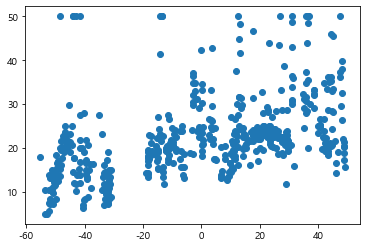

In [41]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

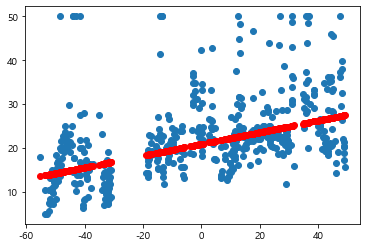

In [42]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [43]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.0s finished


{'fit_time': array([0.00797844, 0.00797844, 0.00797844, 0.00698018, 0.00798035]),
 'score_time': array([0.00099826, 0.00099826, 0.        , 0.00099826, 0.0009973 ]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [44]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:    1.3s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [47]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])
{'model__C': 0.1, 'model__epsilon': 1.0, 'model__gamma': 'scale'}


In [51]:
model = SVR(kernel="linear", C=0.1, gamma="scale", epsilon=1.0)
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.7056780521066561
테스트 결과 :  0.6522312403975564


##### 2) Diabetes Sample

In [53]:
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)

SVR(kernel='linear')

In [56]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.5252220897200242
테스트 결과 :  0.418443333470488


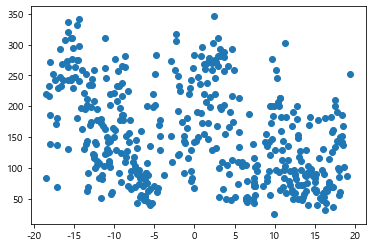

In [57]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

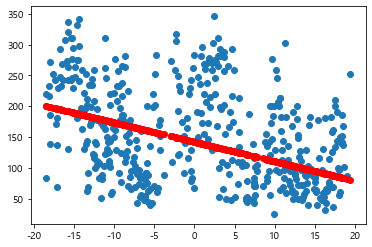

In [58]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [59]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.5s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.9s finished


{'fit_time': array([0.00498772, 0.00299239, 0.00398993, 0.00398993, 0.00498629]),
 'score_time': array([0.0009973 , 0.00099754, 0.0009973 , 0.        , 0.00099826]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [60]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  65 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:    0.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [61]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])
{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}


In [62]:
model = SVR(kernel="linear", C=1.0, gamma="scale", epsilon=1.0)
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.5260816099294854
테스트 결과 :  0.422199860585585


### (5) KernelSVR

##### 1) 보스턴 Housing Sample

In [63]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
model = SVR(kernel="rbf")
model.fit(X_train, y_train)

SVR()

In [66]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.6844689845382028
테스트 결과 :  0.6068067562983952


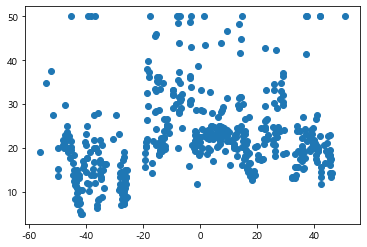

In [67]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

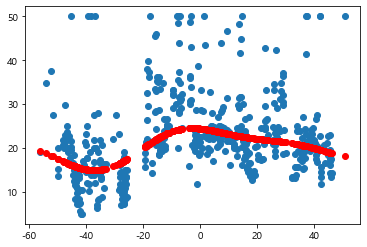

In [68]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [69]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.3s finished


{'fit_time': array([0.00598335, 0.00598335, 0.00598335, 0.00598335, 0.00598335]),
 'score_time': array([0.00099778, 0.00099778, 0.00099778, 0.00099778, 0.00099778]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [71]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="rbf"))])
params = [{"model__kernel":["rbf", "polynomial", "sigmoid"]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [72]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])
{'model__kernel': 'rbf'}


In [73]:
##### 이제 모델은 rbf로 결정하고 다른 파라미터를 지정

pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="rbf"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  75 out of  90 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [74]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])
{'model__C': 1.0, 'model__epsilon': 0.01, 'model__gamma': 'scale'}


In [75]:
model = SVR(kernel="rbf", C=1.0, gamma="scale", epsilon=0.01)
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.6830905775674738
테스트 결과 :  0.6061034517833814


##### 2) Diabetes Sample

In [76]:
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [77]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
model = SVR(kernel="rbf")
model.fit(X_train, y_train)

SVR()

In [79]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.16916944668371714
테스트 결과 :  0.12974188091323668


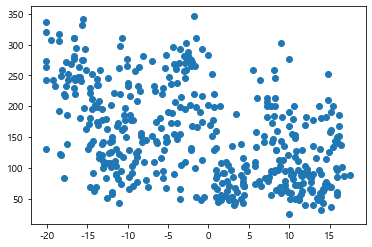

In [80]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

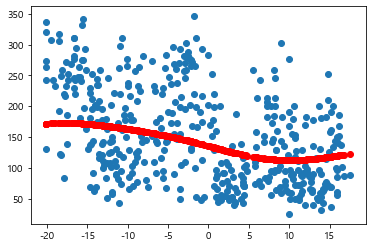

In [81]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [82]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:   12.7s remaining:   19.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:   13.0s finished


{'fit_time': array([0.00498629, 0.00492859, 0.00498557, 0.00498676, 0.00398874]),
 'score_time': array([0.0009985 , 0.        , 0.00099754, 0.0009973 , 0.00099802]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [83]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="rbf"))])
params = [{"model__kernel":["rbf", "polynomial", "sigmoid"]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [84]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])
{'model__kernel': 'sigmoid'}


In [85]:
##### 이제 모델은 sigmoid로 결정하고 다른 파라미터 지정

pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="sigmoid"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  75 out of  90 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [86]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])
{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'auto'}


In [87]:
model = SVR(kernel="sigmoid", C=1.0, gamma="auto", epsilon=1.0)
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.34746037904641447
테스트 결과 :  0.3682895493456452


### (6) LinearSVC

##### 1) 유방암  Sample

In [88]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [89]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

In [91]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9906103286384976
테스트 결과 :  0.986013986013986


In [93]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

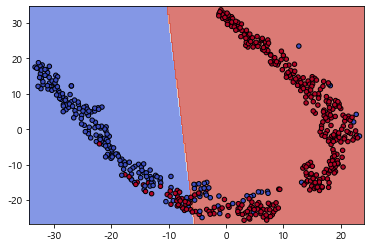

In [95]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [96]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.0s finished


{'fit_time': array([0.00398827, 0.0029912 , 0.00399017, 0.00299501, 0.00398898]),
 'score_time': array([0.        , 0.00099707, 0.        , 0.00099349, 0.        ]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [97]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVC(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01]
    }
]


gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [98]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
{'model__C': 0.1, 'model__gamma': 'scale'}


In [99]:
model = SVC(kernel="linear", C=0.1, gamma="scale")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9788732394366197
테스트 결과 :  0.993006993006993


##### 2) 붓꽃 데이터

In [100]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

In [103]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9910714285714286
테스트 결과 :  0.9736842105263158


In [104]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

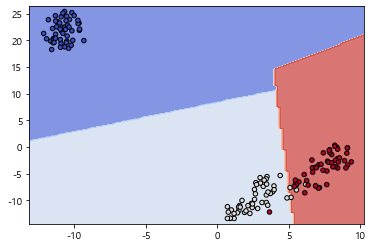

In [105]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [106]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.0s finished


{'fit_time': array([0.00099802, 0.00099349, 0.00099349, 0.00199533, 0.00099802]),
 'score_time': array([0.       , 0.0009973, 0.       , 0.       , 0.       ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [107]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVC(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01]
    }
]


gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [108]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])
{'model__C': 1.0, 'model__gamma': 'scale'}


In [109]:
model = SVC(kernel="linear", C=1.0, gamma="scale")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9910714285714286
테스트 결과 :  0.9736842105263158


##### 3) Wine Sample

In [110]:
X, y = load_wine(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [111]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

In [113]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  1.0
테스트 결과 :  0.9555555555555556


In [114]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

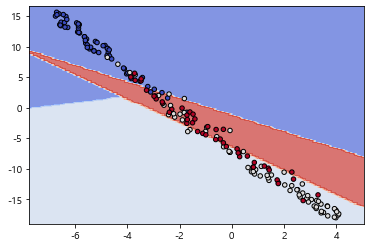

In [115]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [116]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00199461, 0.00099754, 0.00099754, 0.00099659, 0.0009973 ]),
 'score_time': array([0.00099659, 0.0009973 , 0.0009985 , 0.00099683, 0.0009973 ]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [117]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVC(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01]
    }
]


gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [118]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
{'model__C': 0.1, 'model__gamma': 'scale'}


In [120]:
#model = SVC(kernel="linear", C=0.1, gamma="scale")
#model.fit(X_train, y_train)
model = gs.best_estimator_
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  1.0
테스트 결과 :  0.9777777777777777


### (7) KernelSVC

##### 1) 유방암 데이터

In [121]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [122]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
model = SVC(kernel="rbf")
model.fit(X_train, y_train)

SVC()

In [125]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9835680751173709
테스트 결과 :  0.986013986013986


In [126]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

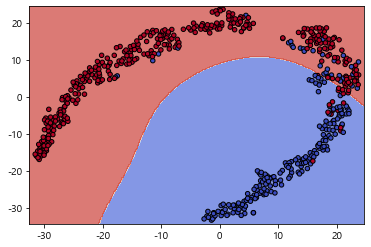

In [127]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [128]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.0s finished


{'fit_time': array([0.00398946, 0.00299215, 0.00398874, 0.00398874, 0.00398898]),
 'score_time': array([0.00099802, 0.00099778, 0.00099778, 0.00099778, 0.00099707]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [129]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVC(kernel="rbf"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01]
    }
]


gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [130]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])
{'model__C': 1.0, 'model__gamma': 'scale'}


In [131]:
model = gs.best_estimator_
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9835680751173709
테스트 결과 :  0.986013986013986


##### 2) 붓꽃 데이터

In [132]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [133]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
model = SVC(kernel="rbf")
model.fit(X_train, y_train)

SVC()

In [135]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9821428571428571
테스트 결과 :  0.9473684210526315


In [136]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

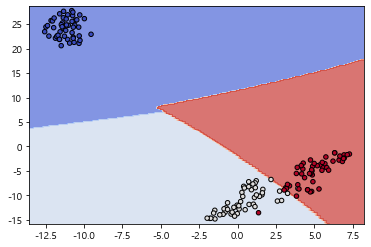

In [137]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [138]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00104547, 0.00197434, 0.00092888, 0.00193   , 0.00100112]),
 'score_time': array([0.        , 0.        , 0.00100112, 0.        , 0.00099444]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [139]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVC(kernel="rbf"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01]
    }
]


gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [140]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])
{'model__C': 1.0, 'model__gamma': 'scale'}


In [141]:
model = SVC(kernel="linear", C=0.1, gamma="scale")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9732142857142857
테스트 결과 :  0.9210526315789473


##### 3) Wine Sample

In [142]:
X, y = load_wine(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [143]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
model = SVC(kernel="rbf")
model.fit(X_train, y_train)

SVC()

In [145]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  1.0
테스트 결과 :  0.9777777777777777


In [146]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

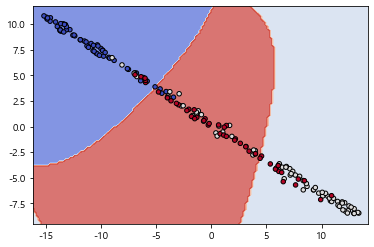

In [147]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [149]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00106382, 0.00202203, 0.0009582 , 0.0009706 , 0.00197673]),
 'score_time': array([0.       , 0.       , 0.0009706, 0.       , 0.       ]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [150]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVC(kernel="rbf"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01]
    }
]


gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [151]:
##### 어떤 값이 최적의 파라미터인가?
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])
{'model__C': 1.0, 'model__gamma': 'scale'}


In [153]:
model = SVC(kernel="rbf", C=1.0, gamma="scale")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  1.0
테스트 결과 :  0.9777777777777777


# 4. 예제

### (1) 농구선수의 포지션 예측

In [175]:
df = pd.read_csv("data/basketball_stat.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [155]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


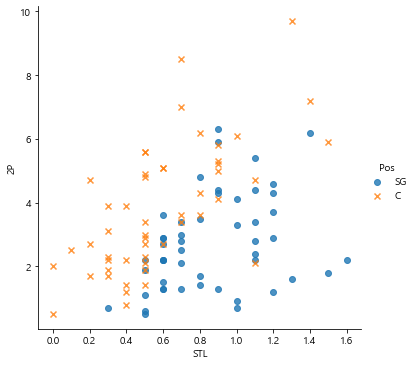

In [156]:
sns.lmplot("STL", "2P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"])

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


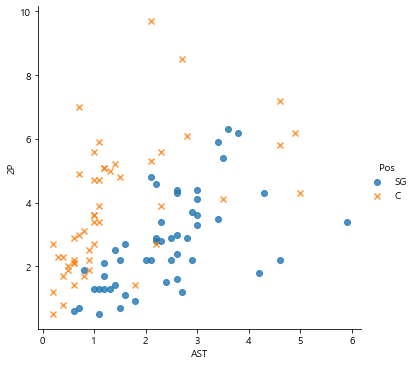

In [157]:
sns.lmplot("AST", "2P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"])

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


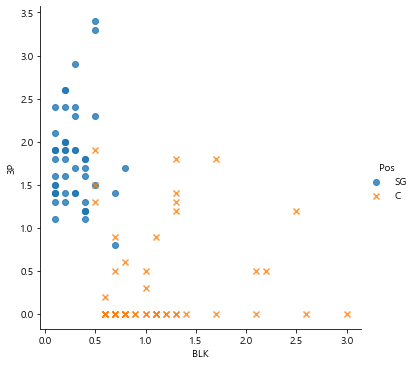

In [158]:
sns.lmplot("BLK", "3P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"])

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


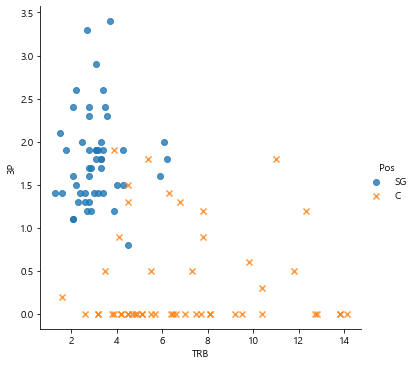

In [159]:
sns.lmplot("TRB", "3P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"])

In [176]:
df.drop(["2P", "AST", "STL"], axis=1, inplace=True)

In [177]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [178]:
train, test = train_test_split(df, test_size=.2)
print(train.shape, test.shape)  

(80, 5) (20, 5)


In [179]:
X_train = train[["3P","TRB", "BLK"]]
y_train = train["Pos"]

In [180]:
params = [
    {
        "kernel":["rbf", "poly", "sigmoid"],
        "gamma" :["scale", "auto"],
        "C" : [0.01, 0.1, 1, 10, 100, 1000]
    }
]

svm = GridSearchCV(SVC(), params).fit(X_train, y_train)

In [181]:
X_test = test[["3P", "TRB", "BLK"]]
y_test = test["Pos"]

preds = svm.predict(X_test)

In [182]:
print("정확도 : ", accuracy_score(y_test, preds))

정확도 :  0.95


### (2) 손글씨 이미지

+ 포터블 비트맵
    - PBM : 하나의 화소를 1bit로 표현
    - PGM : 하나의 화소를 1byte로 표현
    - PPM : 하나의 화소를 3byte로 표현(RGB)
    
    
+ header
    - magic number
        - P1, P4 : PBM
        - P2, P5 : PGM
        - P3, P6 : PPM
    - width, height
    - 영상 데이터의 최대값

In [4]:
def load_csv(fname):
    labels = []
    images = []
    
    f = open(fname, "r")
    for line in f:
        cols = line.split(",")
        if len(cols) < 2:
            continue
            
        labels.append(int(cols.pop(0)))
        
        vals = list(map(lambda n : round(int(n)/256), cols))
        images.append(vals)
    
    f.close()
    
    return {"y":labels, "X":images}

In [5]:
data = load_csv("data/mnist/train.csv")
test = load_csv("data/mnist/t10k.csv")

In [6]:
print(test["X"][2])
print(test["y"][2])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
model = SVC().fit(data["X"], data["y"])

In [8]:
preds = model.predict(test["X"])

In [9]:
acc = accuracy_score(test["y"], preds)
print("정확도 : ", acc)

정확도 :  0.9540918163672655


In [10]:
print(classification_report(test["y"], preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       1.00      1.00      1.00        67
           2       0.96      0.95      0.95        55
           3       0.95      0.89      0.92        46
           4       0.96      0.98      0.97        55
           5       0.92      0.94      0.93        50
           6       0.95      0.93      0.94        43
           7       0.92      0.98      0.95        49
           8       0.91      0.97      0.94        40
           9       1.00      0.91      0.95        54

    accuracy                           0.95       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.96      0.95      0.95       501



In [11]:
pred1 = model.predict([test["X"][220]])
pred1
test["X"][220]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [12]:
test["y"][220]

7

In [13]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [14]:
from IPython.display import HTML
HTML(input_form + javascript)

In [15]:
print(image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [24]:
pred2 = model.predict([image])
pred2

array([2])

# 5. 학습 모델 저장

+ pickle
+ joblib

#### 1) pickle : serializable

In [37]:
import pickle

phone = {"tom":"1111-1111", "길동":"2222-2222"}
product = ["마우스", "키보드"]

obj = (phone, product)
print(obj[1][0], obj[0]["tom"])

f = open("data/obj1.pickle", "wb")
pickle.dump(obj, f)

f.close()

마우스 1111-1111


In [38]:
f = open("data/obj1.pickle", "rb")
obj2 = pickle.load(f)

print(obj2[1][0], obj2[0]["tom"])

f.close()

마우스 1111-1111


In [43]:
##### 학습된 데이터 모델 저장

iris = load_iris()
X, y = iris.data, iris.target

clf = LogisticRegression(random_state=0, max_iter=10000)
clf.fit(X, y)

LogisticRegression(max_iter=10000, random_state=0)

In [45]:
f = open("data/iris_logistic.pickle", "wb")
pickle.dump(clf, f)
f.close()

In [47]:
f = open("data/iris_logistic.pickle", "rb")
clf2 = pickle.load(f)

print(clf2.predict(X))

f.close()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 2) joblib

In [48]:
import joblib

In [49]:
joblib.dump(clf, "data/iris_logistic.pkl")

['data/iris_logistic.pkl']

In [50]:
clf3 = joblib.load("data/iris_logistic.pkl")

In [51]:
print(clf3.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
